<a href="https://colab.research.google.com/github/wesleiferreira98/Analise-do-Algoritmo-de-K-means/blob/main/An%C3%A1lise_do_Algoritmo_de_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessarias 

In [1]:
import gdown # type: ignore
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import zipfile
import os

# Preparação dos Dados

In [3]:
# URL do arquivo no Google Drive
drive_url = "https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg"

# Caminho para salvar o arquivo
zip_path = "UCI_HAR_Dataset.zip"

# Baixar o arquivo usando gdown
gdown.download(drive_url, zip_path, quiet=False)

# Extração do arquivo zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("UCI_HAR_Dataset")

# Caminho dos dados extraídos
data_path = "UCI_HAR_Dataset/UCI HAR Dataset"

# Função para carregar os dados
def load_data(data_path, dataset_type="train"):
    X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),
                    delim_whitespace=True, header=None)
    return X

# Combine os dados de treino e teste
X_train = load_data(data_path, "train")
X_test = load_data(data_path, "test")
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)

print(f"Shape dos dados carregados: {X.shape}")

Downloading...
From (original): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg
From (redirected): https://drive.google.com/uc?id=1mHErmi7eyo2b6an8tCOsj1FoJ54N7Pkg&confirm=t&uuid=78243c5f-8c42-4050-aacd-b6958d8be1b1
To: /content/UCI_HAR_Dataset.zip
100%|██████████| 61.0M/61.0M [00:00<00:00, 62.8MB/s]
<ipython-input-3-48285067a413>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),
<ipython-input-3-48285067a413>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(os.path.join(data_path, f"{dataset_type}/X_{dataset_type}.txt"),


Shape dos dados carregados: (10299, 561)


# Normalização e Redução de Dimensionalidade (PCA)

Shape após PCA: (10299, 2)


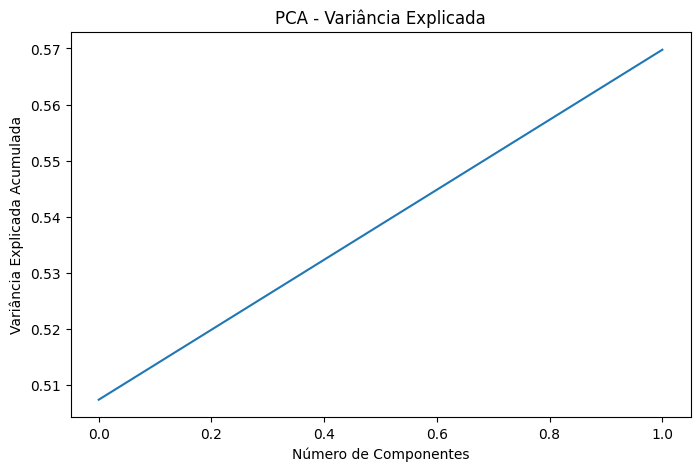

In [4]:
# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)  # Altere para 3 se quiser visualizações em 3D
X_pca = pca.fit_transform(X_normalized)

print(f"Shape após PCA: {X_pca.shape}")

# Visualizar a variância explicada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada')
plt.show()

# Implementação do K-means

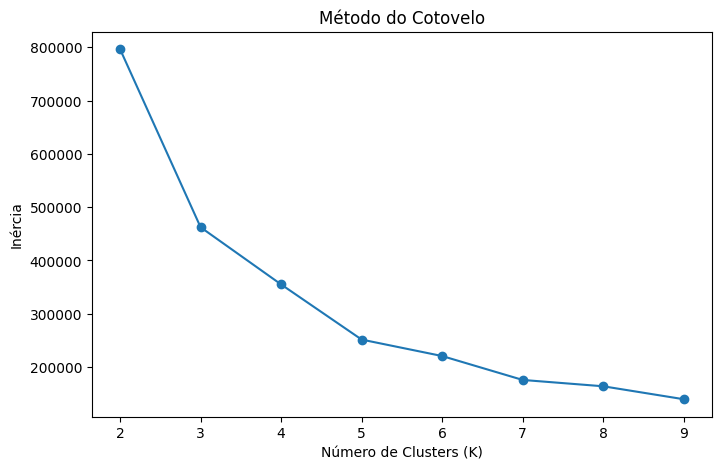

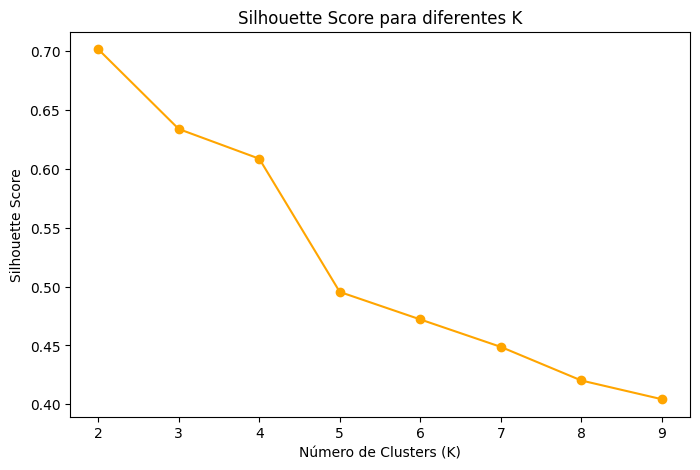

Clusters formados: [0 1 2 3]


In [5]:
# Escolher o número ideal de clusters usando o método do cotovelo
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Visualizar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# Visualizar silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

# Escolher o número ideal de clusters baseado nos gráficos
best_k = 4  # Altere conforme os gráficos
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

print(f"Clusters formados: {np.unique(clusters)}")

# Visualização dos Resultados

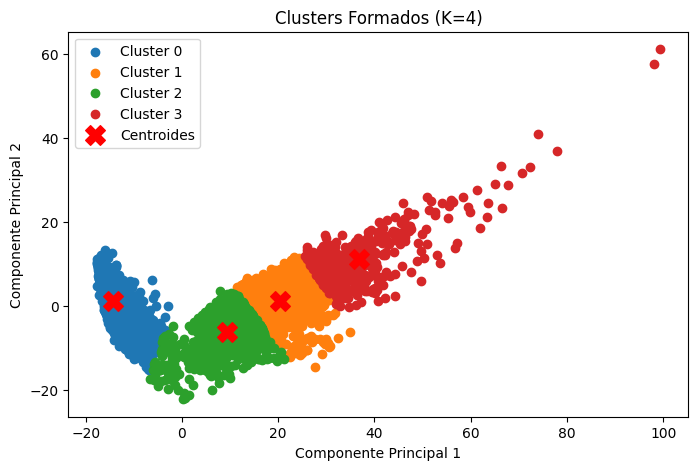

In [6]:
# Visualizar os clusters
plt.figure(figsize=(8, 5))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroides', marker='X')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clusters Formados (K={best_k})')
plt.legend()
plt.show()

# Análise e Avaliação

In [7]:
# Silhouette Score final
final_silhouette = silhouette_score(X_pca, clusters)
print(f"Silhouette Score Final: {final_silhouette}")

# Visualizar os centroides
print("Centroides dos clusters (no espaço reduzido pelo PCA):")
print(kmeans.cluster_centers_)

Silhouette Score Final: 0.6086222898948482
Centroides dos clusters (no espaço reduzido pelo PCA):
[[-14.31207841   1.13963374]
 [ 20.32975529   1.23264656]
 [  9.37613141  -6.18841411]
 [ 36.85508347  11.02876535]]
